In [1]:
import os
import io
from os import listdir
from os.path import isfile, join
from io import StringIO
%matplotlib inline

# Data wrapper libraries
import pandas as pd
import numpy as np
from collections import Counter

#Data Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
import seaborn as sns

#Date time Libraries
import time
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import eli5
from scipy import sparse
from nltk.stem import PorterStemmer

import PyPDF2
import textract
import docx
from docx import Document

from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfinterp import PDFPageInterpreter, PDFResourceManager
from pdfminer.pdfpage import PDFPage

import comtypes.client
import time

## Textification of documents

1) Text extraction from PDFs,Images and .docx proves to be easier.                                  
2) .doc to be converted to pdf as it's taking longer time

Creating functions based on the above rules

In [131]:
#Function to extract data from PDF
def pdfparser(data):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)

    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    with open(data, 'rb') as fp:
        for page in PDFPage.get_pages(fp,
                                      pagenos, 
                                      maxpages=maxpages,
                                      password=password,
                                      caching=caching,
                                      check_extractable=False):
            interpreter.process_page(page)

    # As pointed out in another answer, this goes outside the loop
    text = retstr.getvalue()

    device.close()
    retstr.close()
    return text

#Function to extract data from Word(.docx) files
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

#Function to convert .doc to .pdf
def doc_2_pdf(path,file):
    wdFormatPDF = 17
    in_file = file
    out_file = path+"\\"+os.path.splitext(in_file)[0]+"."+"pdf"
    word = comtypes.client.CreateObject('Word.Application')
    word.Visible = True
    time.sleep(3)
    # convert docx file 1 to pdf file 1
    doc=word.Documents.Open(path+"\\"+in_file) # open docx file 1
    doc.SaveAs(out_file, FileFormat=wdFormatPDF) # conversion
    doc.Close() # close docx file 1
    word.Visible = False
    os.remove(path+"\\"+in_file)

In [483]:
import warnings
warnings.filterwarnings('ignore')

In [484]:
path='\\Desktop\\ML Projects\\suryaproject\\Valuations'
for file in glob.glob("*.doc"):
        doc_2_pdf(path,file)

In [135]:
k=0
os.chdir('\\Desktop\\ML Projects\\suryaproject\\Valuations')
docs_df=pd.DataFrame(columns=(['filename','text','class']))
for file in glob.glob("*.pdf"):
    print(file)
    text = ""
    text=pdfparser(file)
    if text!="":
        text=text
    else:
        text = textract.process(640788466, method='tesseract', language='eng')
    docs_df.loc[k,['filename']]=os.path.splitext(file)[0]
    docs_df.loc[k,['text']]=text
    docs_df.loc[k,['class']]=path.split("\\")[-1]
    k+=1
for file in glob.glob("*.jpg"):
    print(file)
    docs_df.loc[k,['filename']]=os.path.splitext(file)[0]
    docs_df.loc[k,['text']]=textract.process(file, method='tesseract', language='eng')
    docs_df.loc[k,['class']]=path.split("\\")[-1]
    k+=1
for file in glob.glob("*.png"):
    print(file)
    docs_df.loc[k,['filename']]=os.path.splitext(file)[0]
    docs_df.loc[k,['text']]=textract.process(file, method='tesseract', language='eng')
    docs_df.loc[k,['class']]=path.split("\\")[-1]
    k+=1
for file in glob.glob("*.gif"):
    print(file)
    docs_df.loc[k,['filename']]=os.path.splitext(file)[0]
    docs_df.loc[k,['text']]=textract.process(file, method='tesseract', language='eng')
    docs_df.loc[k,['class']]=path.split("\\")[-1]
    k+=1
for file in glob.glob("*.docx"):
    print(file)
    docs_df.loc[k,['filename']]=os.path.splitext(file)[0]
    docs_df.loc[k,['text']]=getText(file)
    docs_df.loc[k,['class']]=path.split("\\")[-1]
    k+=1

2015springvaluationreport.pdf
2016.GAVR.FINAL.pdf
ABAR sample excerpt.pdf
AxiomValuationSampleCertifiedReport.pdf
Commercial Valuation_Report (Example).pdf
Company-Valuation-Report-MSFT-2010-11-15.pdf
english_danaat_al_madina_valuation_report_updated.pdf
fair-valuation.pdf
HSBC_architect_valuation_report.pdf
Kinnisvara_hindamise_akt_30.09_Ukraina.pdf
mortgageValuation_1429034405.pdf
property-valuation-report.pdf
Sample_Business_Valuation_Report.pdf
StateRoad84Appraisal.pdf
VR_Sum08.pdf


Create csv files per class and then perform the merge operation similiarly as below

In [136]:
docs_df.to_excel('C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\docs_df_valuations.xlsx')

In [2]:
data_agreements=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\data\\docdf_agreements.xlsx")
data_deeds=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\data\\docdf_deeds.xlsx")
data_hr=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\data\\docdf_hr.xlsx")
data_taxes=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\data\\docs_df_taxes.xlsx")
data_valuations=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\data\\docs_df_valuations.xlsx")
data_litigations=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\suryaproject\\data\\docsdf_litigation.xlsx")

In [3]:
data=pd.concat([data_agreements,data_deeds,data_hr,data_taxes,data_valuations,data_litigations],ignore_index=True)

In [4]:
data["class"].value_counts()

Agreements        62
HumanResources    58
Taxes             58
Litigation        57
Deeds             49
Valuations        15
Name: class, dtype: int64

In [447]:
data.shape

(299, 3)

## Text Pre-processing

1) Data Cleaning by removal of digits, tags, stopwords etc.                                                                      
2) Lemmatize the word tokens

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 
ps = PorterStemmer()

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # replace numbers with single space
        total_text = re.sub('\d+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += lemmatizer.lemmatize(word) + " "
                #string += ps.stem(word) + " "
        
        data[column][index] = string

#text processing stage.
start_time = time.clock()
for index, row in data.iterrows():
    if type(row['text']) is str:
        nlp_preprocessing(row['text'], index, 'text')
        print(index)
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [6]:
#Encoding the classes
data["class"]=data["class"].replace(to_replace="Agreements",value=1)
data["class"]=data["class"].replace(to_replace="Taxes",value=2)
data["class"]=data["class"].replace(to_replace="HumanResources",value=3)
data["class"]=data["class"].replace(to_replace="Litigation",value=4)
data["class"]=data["class"].replace(to_replace="Deeds",value=5)
data["class"]=data["class"].replace(to_replace="Valuations",value=6)

#### Train - Test Split

As the volume of the data is less, We are sticking to only train and test and not going for CV data

In [7]:
y_true = data["class"].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)

In [8]:
X_train.shape

(239, 3)

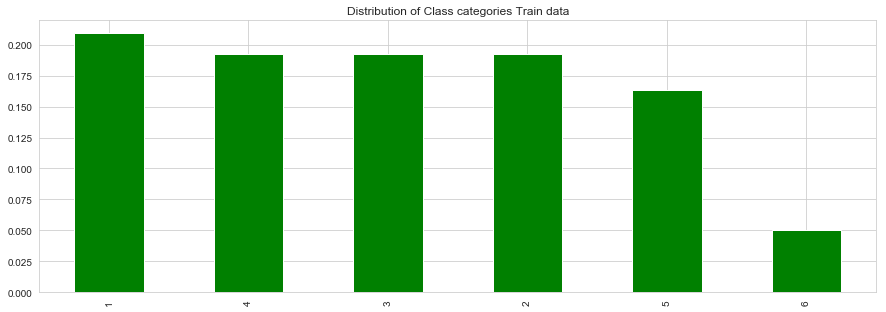

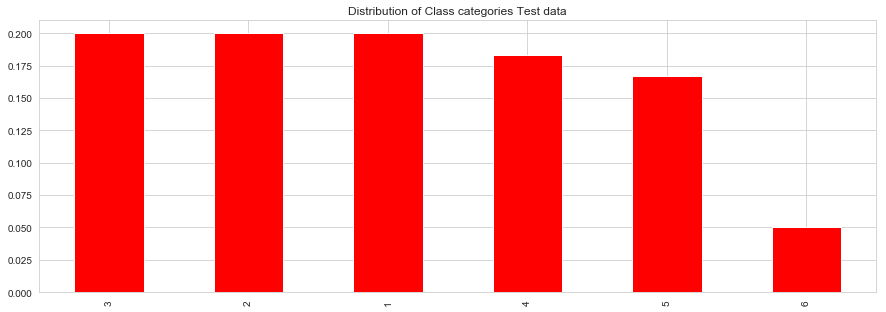

In [9]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
(X_train["class"].value_counts()/len(X_train)).plot(title="Distribution of Class categories Train data",kind='bar',color='green')
plt.show()

plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
(test_df["class"].value_counts()/len(test_df)).plot(title="Distribution of Class categories Test data",kind='bar',color='red')
plt.show()

The distributions of the classes in Test and Train datasets are almost same for all the classes. 

### TF-IDF Vectorizer on "text" feature

In [10]:
vect_word = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(1,3),dtype=np.float32)

In [11]:
#Building the vocabulary
start_time = time.clock()
tr_vect = vect_word.fit_transform(X_train['text'])
#tr_vect_char = vect_char.fit_transform(X_train['text'])
print('Time took for training the TF-IDF vector :',time.clock() - start_time, "seconds")

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Time took for training the TF-IDF vector : 2.7960393119999907 seconds


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


#### Topic Modelling using Latent Semantic Analysis

In [17]:
#Test Data
ts_vect = vect_word.transform(test_df["text"])
#ts_vect_char = vect_char.transform(test_df['text'])

X = tr_vect
#ts_vect=
#x_cv=cv_vect
x_test = ts_vect
y=X_train["class"].values
#y_cv=cv_df["class"].values
y_test=test_df["class"].values

In [55]:
trnacc=[]
tstacc=[]
alpha = [10 ** x for x in range(-12, 3)]
ncomp=[95,96,97,98,99,100]
for i in ncomp:
    a=[]
    c=[]
    print(i," topics","------------------------------------")
    svd_model = TruncatedSVD(n_components=i, algorithm='randomized', n_iter=500, random_state=122)
    X_topics = svd_model.fit_transform(X)
    xtst=svd_model.transform(x_test)
    for j in alpha:
        clf_none = SGDClassifier(alpha=j, penalty='l2', loss='log', random_state=42,class_weight='balanced')
        clf_none.fit(X_topics,y)
        a.append(accuracy_score(y,clf_none.predict(X_topics)))
        c.append(accuracy_score(y_test,clf_none.predict(xtst)))
        #print(c)
        b=max(a)
        d=max(c)
        #print(d)
        #print(j,accuracy_score(y,clf_none.predict(X_topics)))
        #print(j,accuracy_score(y_test,clf_none.predict(xtst)))
    #print(a)
    trnacc.append(b)
    tstacc.append(d)

95  topics ------------------------------------


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

96  topics ------------------------------------


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

97  topics ------------------------------------


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

98  topics ------------------------------------


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

99  topics ------------------------------------


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

100  topics ------------------------------------


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_i

In [56]:
#Max accuracy of each topic number
print(trnacc)
print(tstacc)

[0.9707112970711297, 0.9748953974895398, 0.9748953974895398, 0.9665271966527197, 0.9707112970711297, 0.9748953974895398]
[0.8666666666666667, 0.8833333333333333, 0.9, 0.8833333333333333, 0.9, 0.8833333333333333]


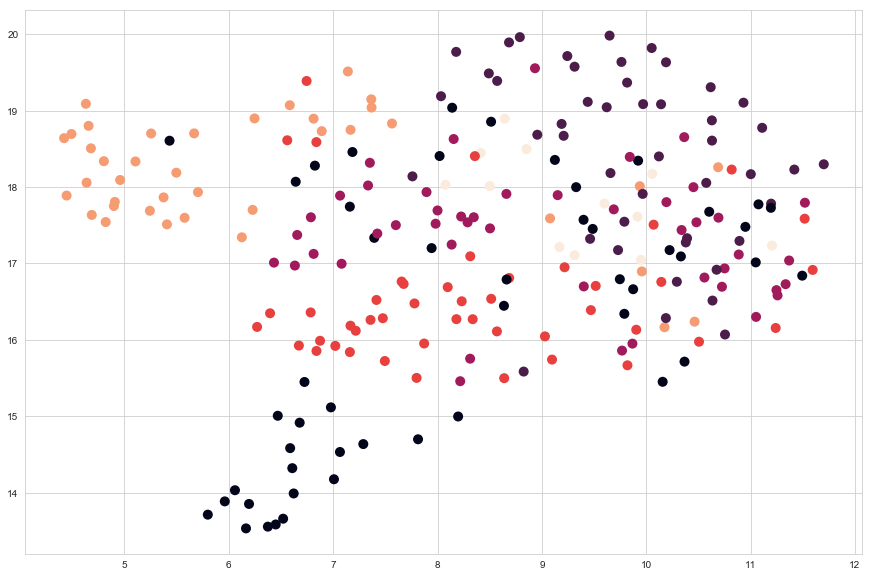

In [29]:
#import umap
import umap.umap_ as umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(15,10))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = y,
s = 100, # size
edgecolor='none'
)
plt.show()

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


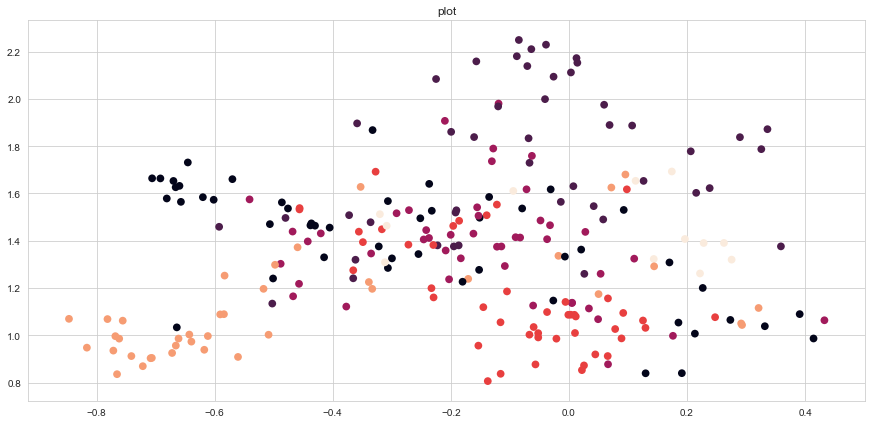

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


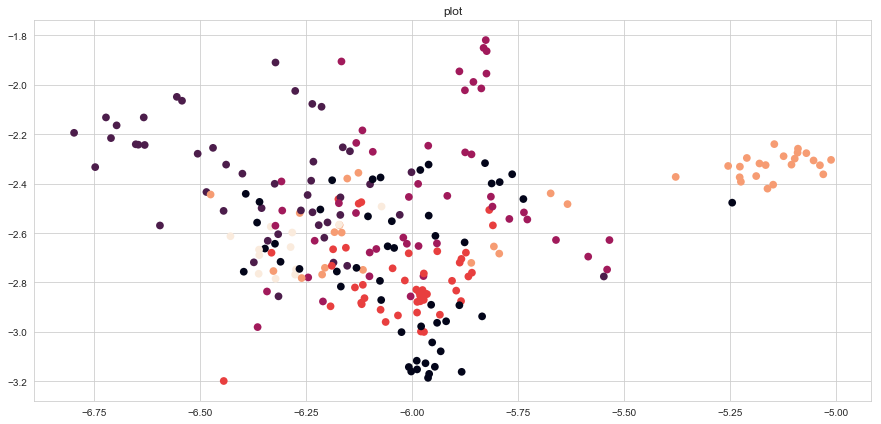

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


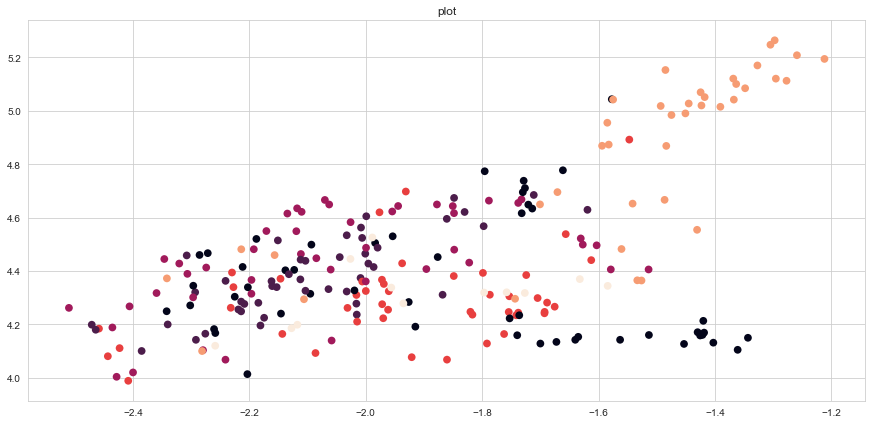

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


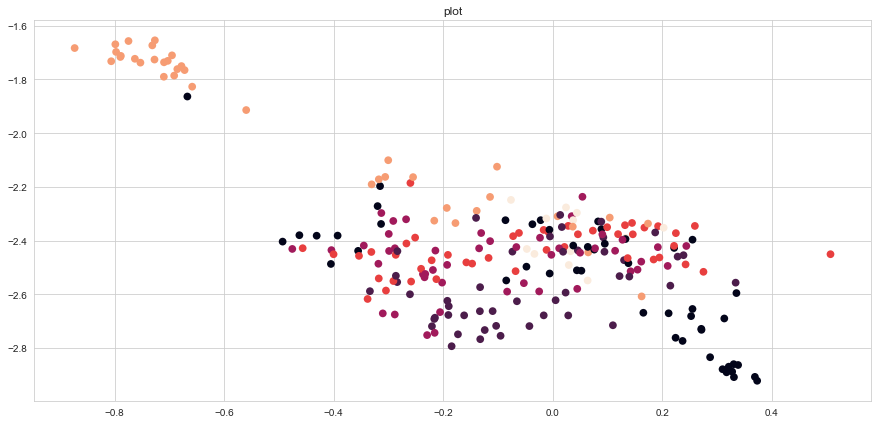

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


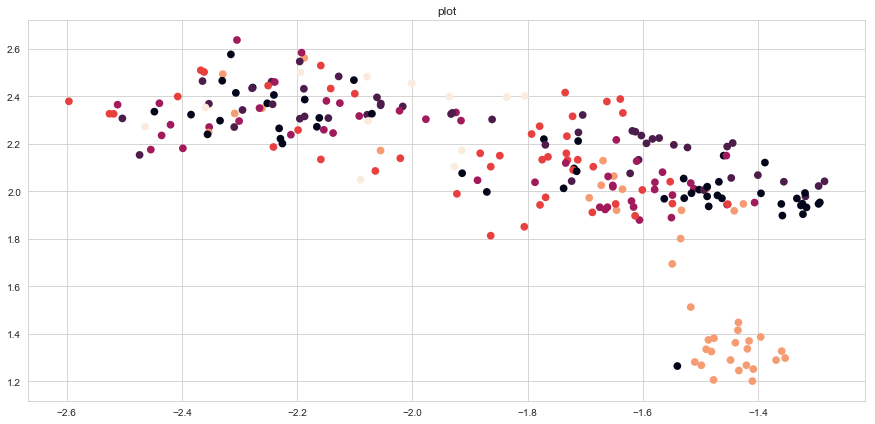

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


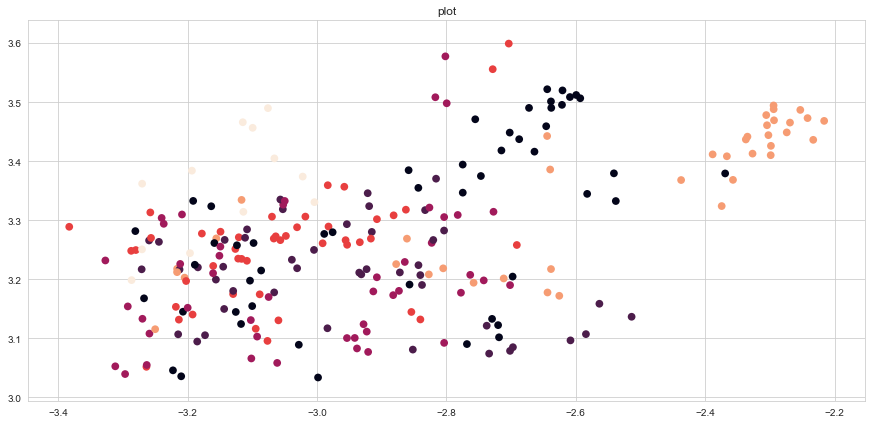

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


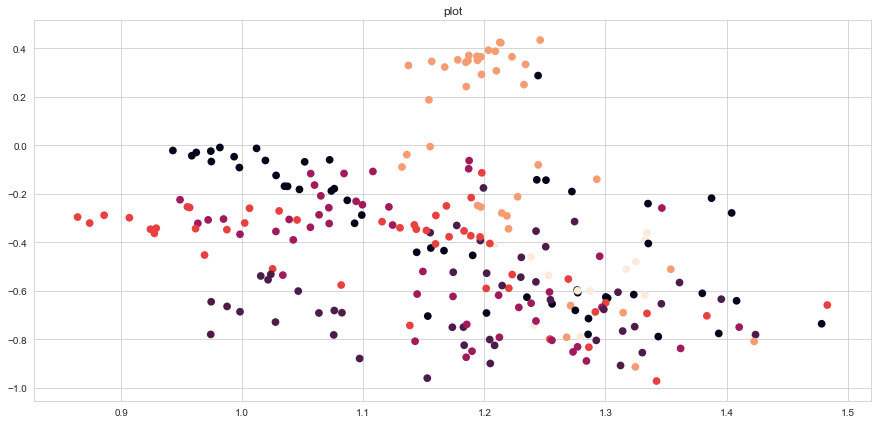

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


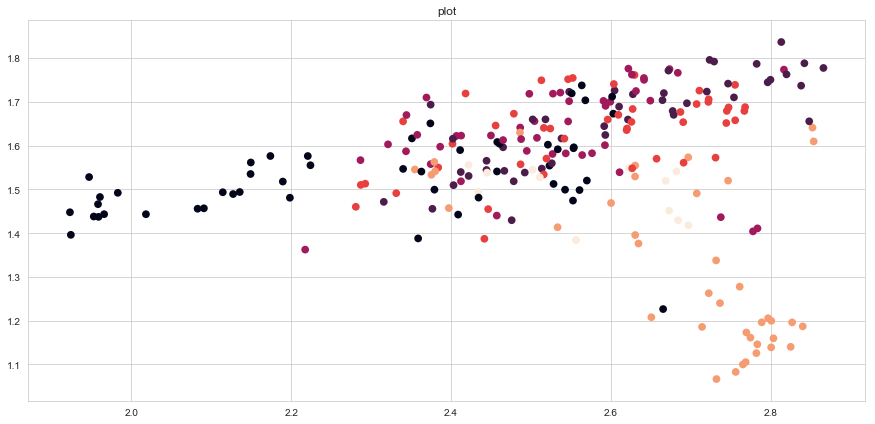

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


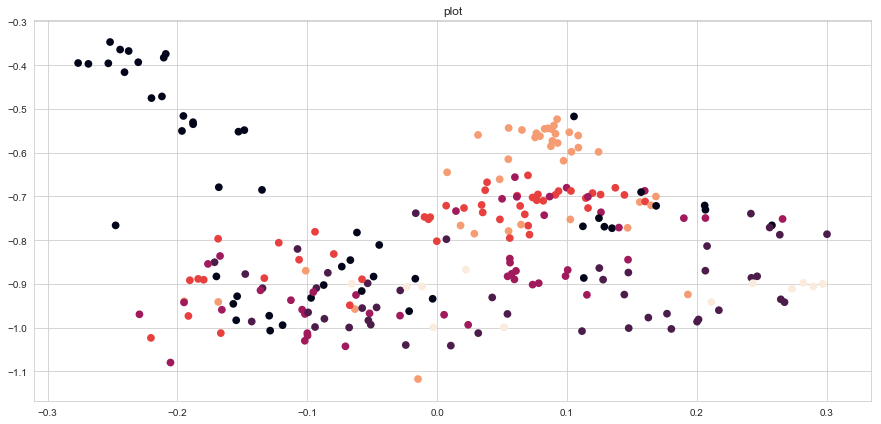

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


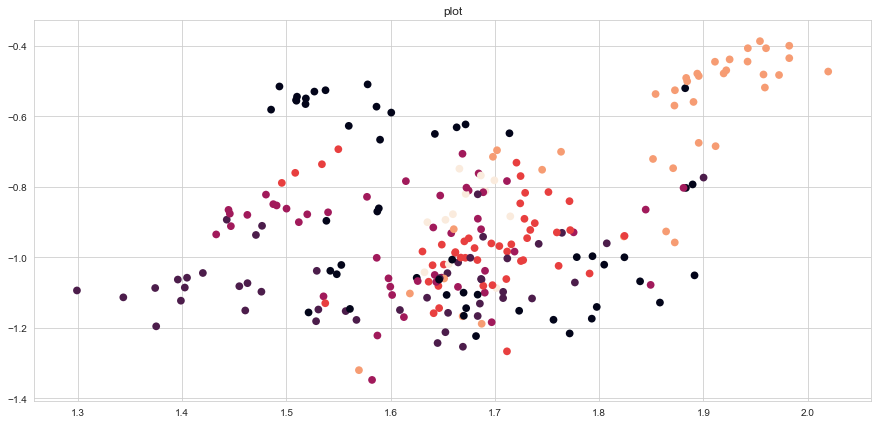

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


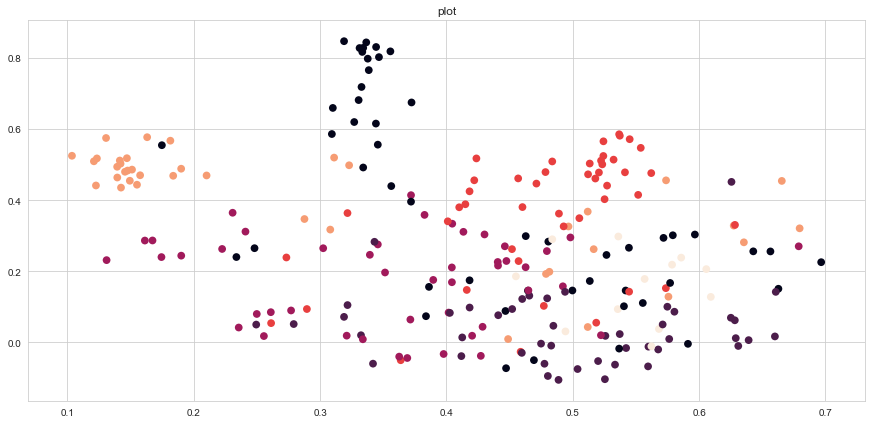

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


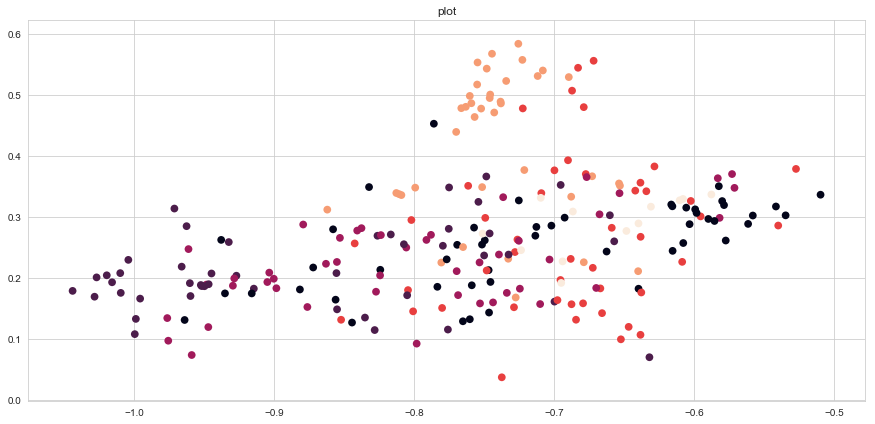

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


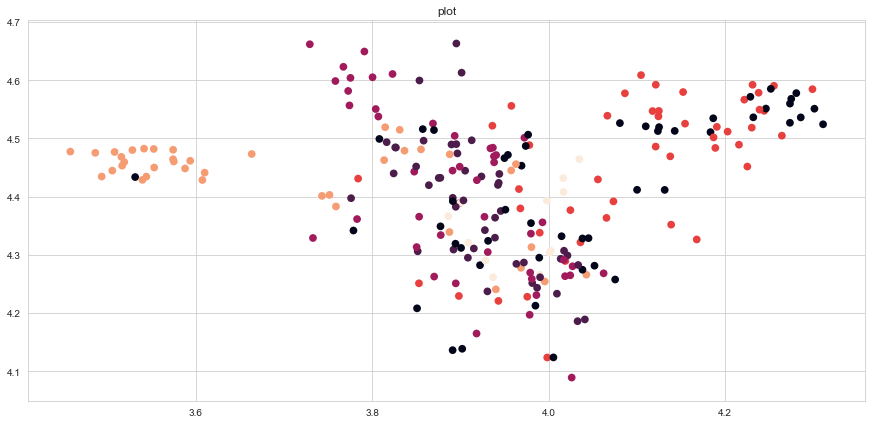

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


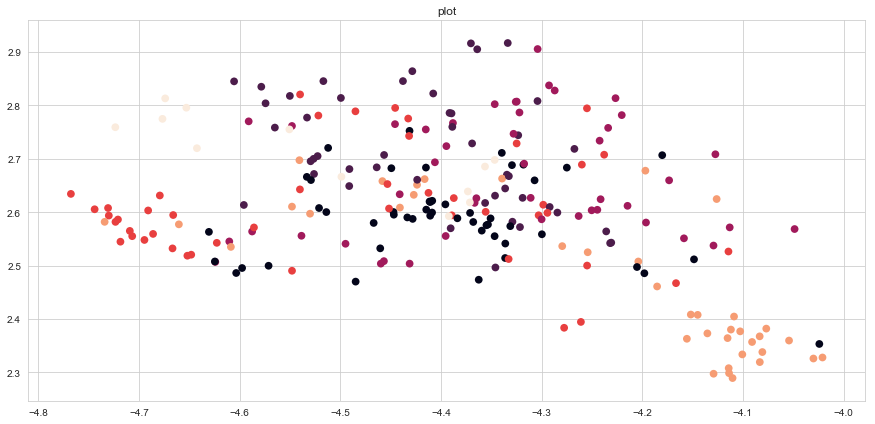

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


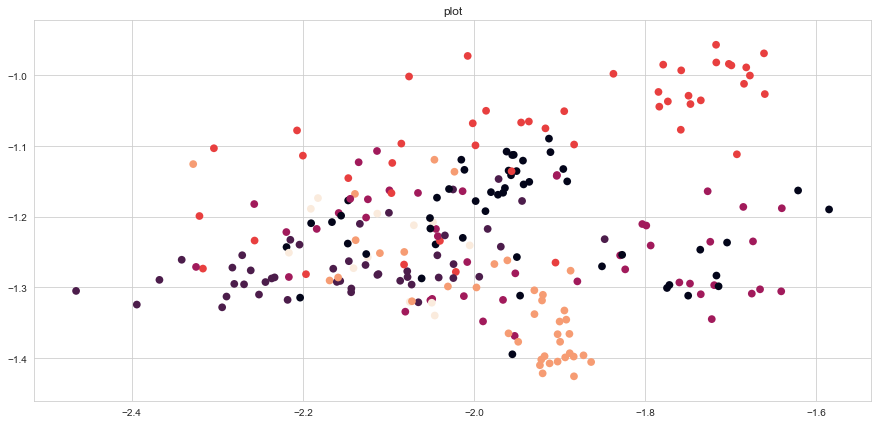

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


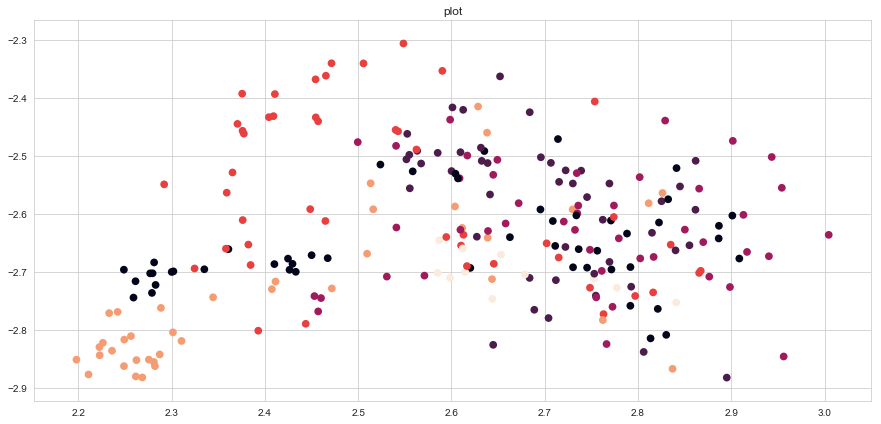

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


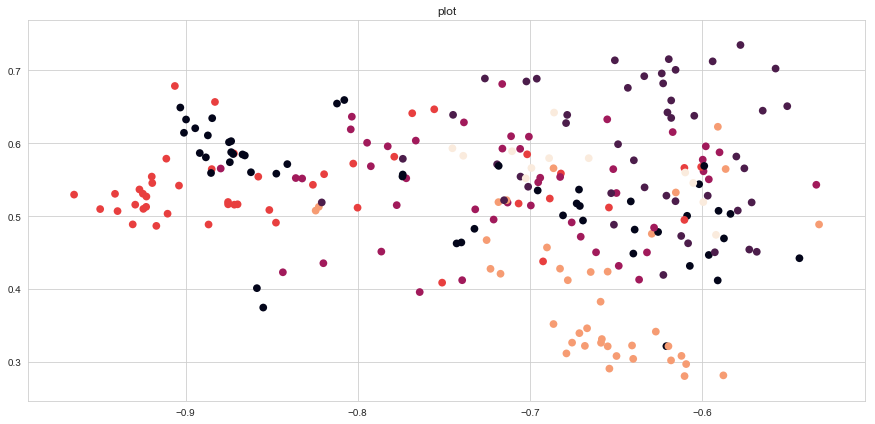

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


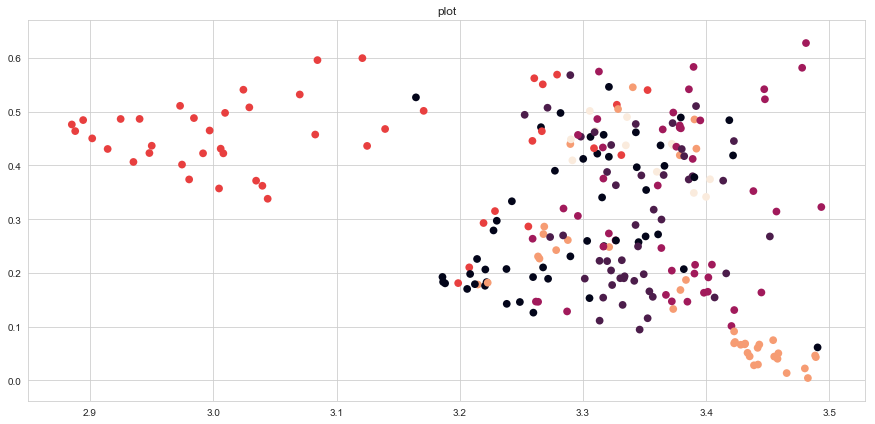

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\umap\umap_.py:1385: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


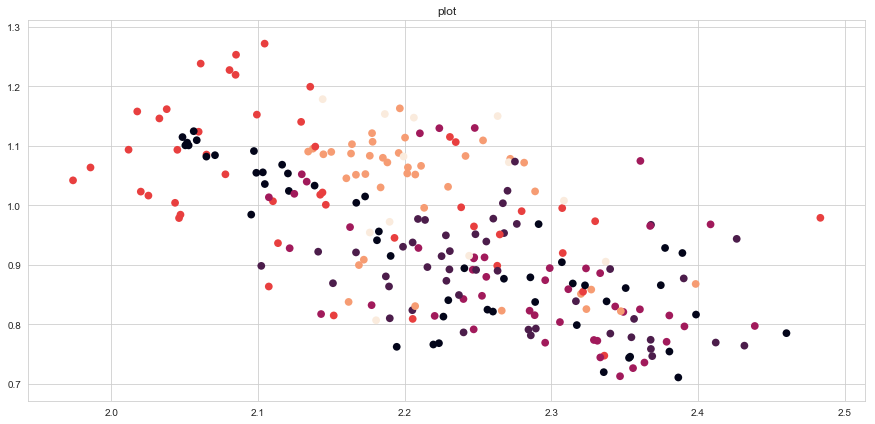

In [53]:
for i in (10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100):
    embedding = umap.UMAP(n_neighbors=1000, min_dist=0, random_state=12,n_components=i).fit_transform(X_topics)
    plt.figure(figsize=(15,7))
    plt.scatter(embedding[:, 0], embedding[:, 1], c = y,s = 60, edgecolor='none')
    plt.title("plot")
    plt.show()

LSA requires huge data. Since we have only 299 documents. The performance of it is not as good as TF-IDF

In [58]:
clf_none.fit(embedding,y)

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=100, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
clf_none.predict()

ValueError: X has 100 features per sample; expecting 95

In [455]:
#Fitting the vocabulary on the Test Data
ts_vect = vect_word.transform(test_df['text'])

In [456]:
vect_word.get_feature_names()[10:20]

['action',
 'activity',
 'actual',
 'addition',
 'additional',
 'address',
 'adequate',
 'adjustment',
 'administration',
 'administrative']

In [457]:
X = tr_vect
#x_cv=cv_vect
x_test = ts_vect
y=X_train["class"].values
#y_cv=cv_df["class"].values
y_test=test_df["class"].values

#### Model 1: Logistic regression with no class balancing

In [485]:
alpha = [10 ** x for x in range(-12, 3)]
for i in alpha:
    clf_none = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,class_weight="balanced")
    clf_none.fit(X,y)
    print(i,accuracy_score(y_test,clf_none.predict(x_test)))

1e-12 0.85
1e-11 0.85
1e-10 0.8166666666666667
1e-09 0.8833333333333333
1e-08 0.8833333333333333
1e-07 0.8666666666666667
1e-06 0.9
1e-05 0.9166666666666666
0.0001 0.9333333333333333
0.001 0.8666666666666667
0.01 0.85
0.1 0.85
1 0.8333333333333334
10 0.16666666666666666
100 0.16666666666666666


In [487]:
clf_none = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', random_state=42,class_weight="balanced")
clf_none.fit(X,y)
print("The best Train accuracy for Logistic regression classifier is at an alpha:",accuracy_score(y,clf_none.predict(X)))
print("The best Test accuracy for Logistic regression classifier is at an alpha:",accuracy_score(y_test,clf_none.predict(x_test)))

The best Train accuracy for Logistic regression classifier is at an alpha: 0.99581589958159
The best Test accuracy for Logistic regression classifier is at an alpha: 0.9333333333333333


### Model 2: SVM

In [488]:
alpha = [10 ** x for x in range(-12, 3)]
for i in alpha:
    clf_svm = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42,class_weight="balanced")
    clf_svm.fit(X,y)
    print(i,accuracy_score(y_test,clf_svm.predict(x_test)))

1e-12 0.8333333333333334
1e-11 0.8333333333333334
1e-10 0.8333333333333334
1e-09 0.8
1e-08 0.85
1e-07 0.85
1e-06 0.85
1e-05 0.8833333333333333
0.0001 0.8833333333333333
0.001 0.8666666666666667
0.01 0.8666666666666667
0.1 0.8166666666666667
1 0.8333333333333334
10 0.16666666666666666
100 0.16666666666666666


In [462]:
clf_svm = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', random_state=42)
clf_svm.fit(X,y)
print("The best Train accuracy for SVM classifier is at an alpha:",accuracy_score(y,clf_svm.predict(X)))
print("The best Test accuracy for SVM classifier is at an alpha:",accuracy_score(y_test,clf_svm.predict(x_test)))

The best Train accuracy for SVM classifier is at an alpha: 0.99581589958159
The best Test accuracy for SVM classifier is at an alpha: 0.9


C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


### Random Forest

In [463]:
from sklearn.ensemble import RandomForestClassifier

In [467]:
clf_random = RandomForestClassifier(random_state=33,n_estimators=110)
clf_random.fit(X,y)
print(accuracy_score(y,clf_random.predict(X)))
print(accuracy_score(y_test,clf_random.predict(x_test)))

0.99581589958159
0.8166666666666667


In [490]:
len("MA SOC Filing Number: 201981594650 Date: 3/13/2019 3:59:00 PM")

61

oops!! Random Forest is overfitting

Let's check the most relevant words of each class suggested by Logistic classifier as it's considered to be the best so far.

In [468]:
eli5.show_weights(clf_none, vec=vect_word, top=100, feature_filter=lambda x: x != '<BIAS>')

Most of the words make sense to their respective class.

In [469]:
from sklearn.ensemble import AdaBoostClassifier

In [471]:
clf_svm = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', random_state=42)
clf_none = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', random_state=42)

In [472]:
clf_none.fit(X,y)
clf_svm.fit(X,y)

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [473]:
print("The best accuracy of SVM classifier is:",accuracy_score(y_test,clf_svm.predict(x_test)))
print("The best accuracy of Logistic classifier is:",accuracy_score(y_test,clf_none.predict(x_test)))
print("The accuracy of RF classifier is:",accuracy_score(y_test,clf_random.predict(x_test)))

The best accuracy of SVM classifier is: 0.9
The best accuracy of Logistic classifier is: 0.9166666666666666
The accuracy of RF classifier is: 0.8166666666666667


### Ensemble Model: Adaboost

Since Adaboost works on the weakest classifier, We are building the classifier on the top of random forest and the result has improved by 3.3%. Yet, It's not better than SVM

In [474]:
clf = AdaBoostClassifier(base_estimator=clf_random,n_estimators=100, random_state=10,learning_rate=0.01)
clf.fit(X, y)  

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=110, n_jobs=None,
            oob_score=False, random_state=33, verbose=0, warm_start=False),
          learning_rate=0.01, n_estimators=100, random_state=10)

In [475]:
print(accuracy_score(y_test,clf.predict(x_test)))

0.85


In [477]:
#Adaboost classifier with base classifier as Logistic classifier
clf = AdaBoostClassifier(base_estimator=clf_none,n_estimators=100, random_state=10,learning_rate=0.01)
clf.fit(X, y)  
print(accuracy_score(y_test,clf.predict(x_test)))

C:\Users\lingadhar_duggirala\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8666666666666667


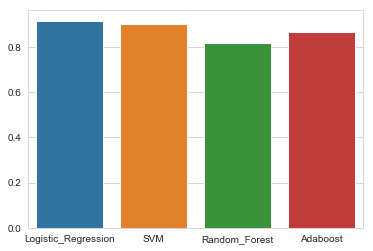

In [480]:
#sns.barplot(x=["Logistic_Regression","SVM","Random_Forest","Adaboost"],y=[accuracy_score(y,clf_none.predict(X)),accuracy_score(y,clf_svm.predict(X)),accuracy_score(y,clf_random.predict(X)),accuracy_score(y,clf.predict(X))])
sns.barplot(x=["Logistic_Regression","SVM","Random_Forest","Adaboost"],y=[accuracy_score(y_test,clf_none.predict(x_test)),accuracy_score(y_test,clf_svm.predict(x_test)),accuracy_score(y_test,clf_random.predict(x_test)),accuracy_score(y_test,clf.predict(x_test))])

Logistic Regression proves to be the best classifier

Let's plot the metrics to dig deeper

### Metrics Analysis

In [482]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    labels = ["Agreements","Taxes","HR","Litigation","Deeds","Valuations"]
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix ", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix ", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

-------------------- Confusion matrix --------------------


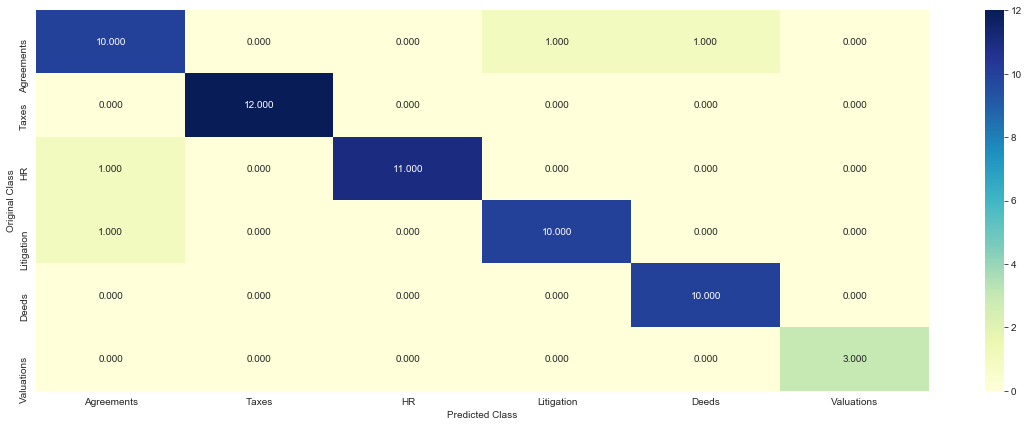

-------------------- Precision matrix  --------------------


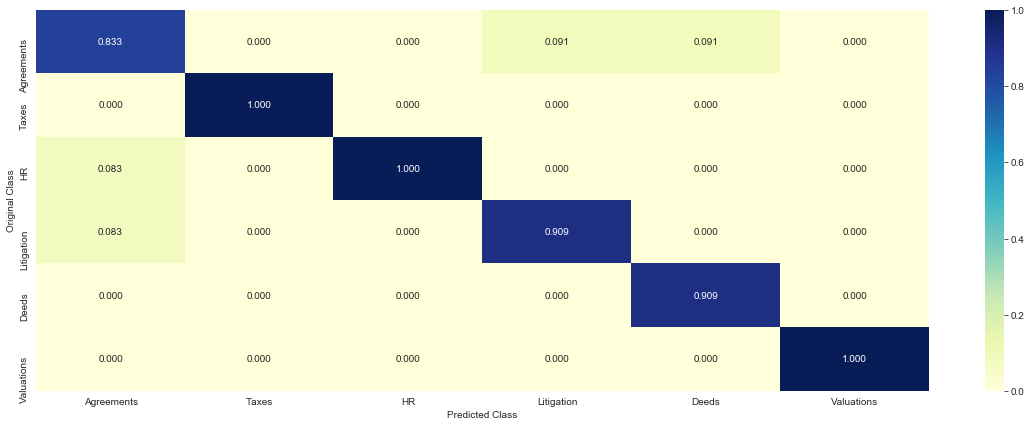

-------------------- Recall matrix  --------------------


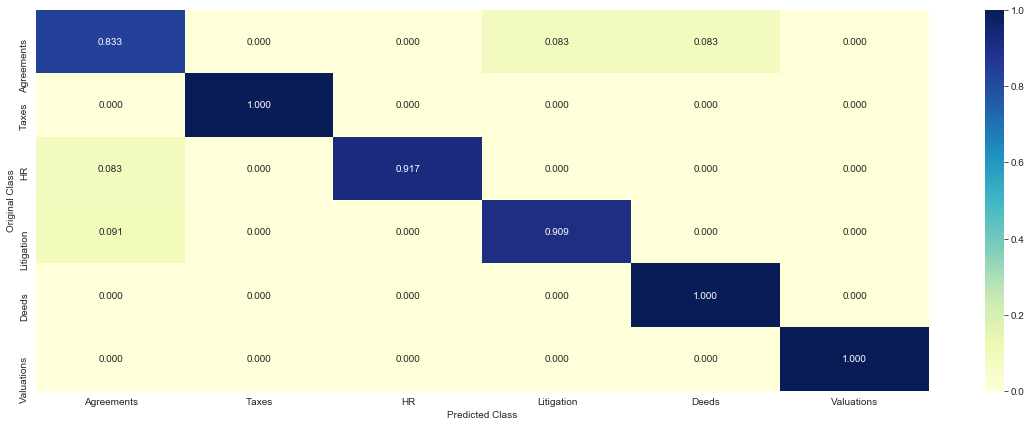

In [489]:
plot_confusion_matrix(y_test,clf_none.predict(x_test))